<a href="https://colab.research.google.com/github/DevTulioDantas/case_regressao_DNC/blob/main/RID211339_Desafio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pip install plotly
%pip install cufflinks
%pip install chart-studio

import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px


In [ ]:
base_Mkt = pd.read_csv("MKT.csv", sep = ",")

base_Mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


Verificação de nulos:

In [ ]:
base_Mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Verificação de duplicadas **negrito**

In [ ]:
base_Mkt_Duplicadas = base_Mkt[base_Mkt.duplicated()]

print(base_Mkt_Duplicadas)


Empty DataFrame
Columns: [youtube, facebook, newspaper, sales]
Index: []


In [ ]:
base_Mkt.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
#Describe grafico do youtube

fig = px.box(base_Mkt, x="youtube")
fig.update_traces(line_color ="red" )


In [ ]:
#Describe grafico do facebook

fig = px.box(base_Mkt, x="facebook")
fig.update_traces(line_color ="blue" )

In [ ]:
#Describe grafico do newspaper

fig = px.box(base_Mkt, x="newspaper")
fig.update_traces(line_color ="gray" )

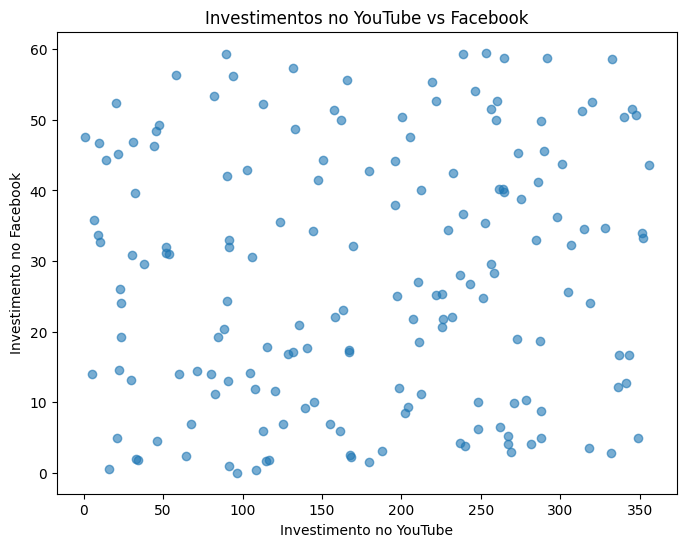

In [ ]:
#Grafico de dispersão

plt.figure(figsize=(8,6))
plt.scatter(base_Mkt['youtube'], base_Mkt['facebook'], alpha=0.6)
plt.title('Investimentos no YouTube vs Facebook')
plt.xlabel('Investimento no YouTube')
plt.ylabel('Investimento no Facebook')
plt.show()

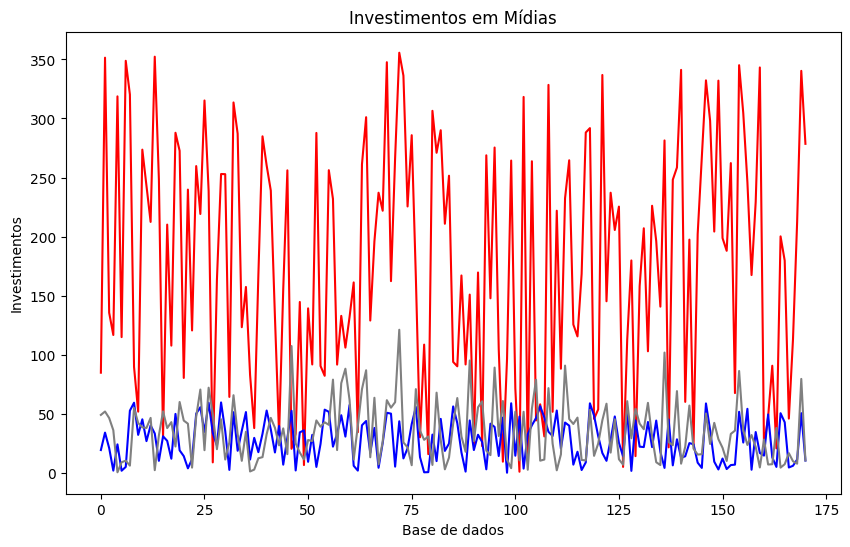

In [ ]:
#investimento ao longo da base de dados

plt.figure(figsize=(10,6))
plt.plot(base_Mkt['youtube'], label='YouTube', color='red')
plt.plot(base_Mkt['facebook'], label='Facebook', color='blue')
plt.plot(base_Mkt['newspaper'], label='Newspaper', color='gray')
plt.title('Investimentos em Mídias')
plt.xlabel('Base de dados')
plt.ylabel('Investimentos')
plt.show()

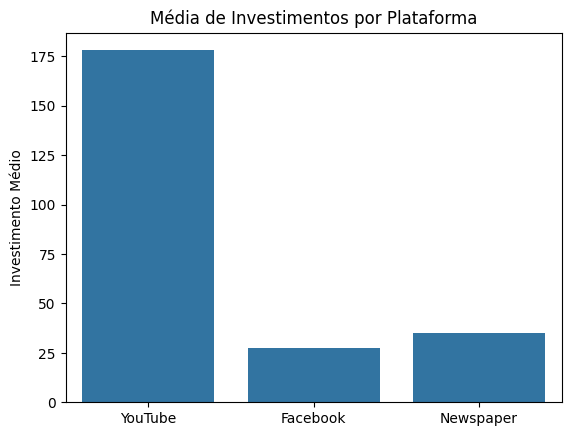

In [ ]:
#media de investimento por plataforma

sns.barplot(x=['YouTube', 'Facebook', 'Newspaper'], y=[base_Mkt['youtube'].mean(), base_Mkt['facebook'].mean(), base_Mkt['newspaper'].mean()])
plt.title('Média de Investimentos por Plataforma')
plt.ylabel('Investimento Médio')
plt.show()

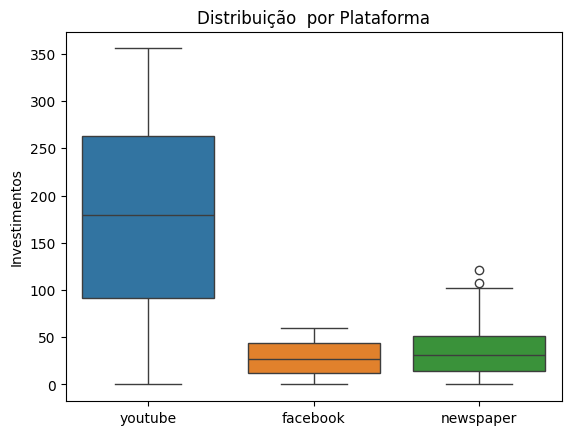

In [ ]:
#Grafico Caixa

sns.boxplot(data=base_Mkt[['youtube', 'facebook', 'newspaper']])
plt.title('Distribuição  por Plataforma')
plt.ylabel('Investimentos')
plt.show()

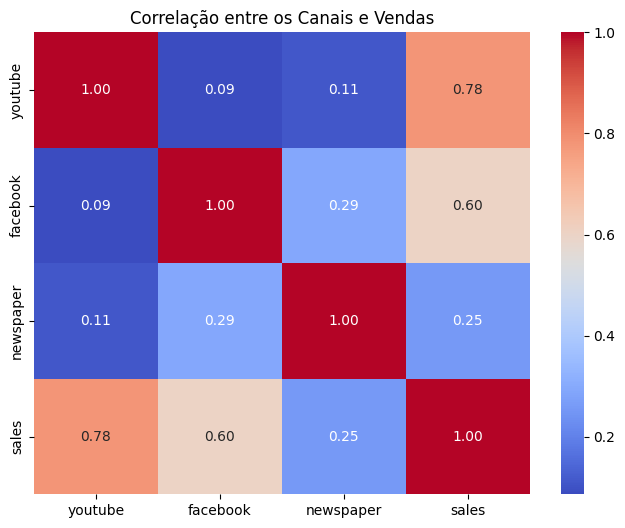

In [ ]:
#heatmap, correlação entre variaveis

corr = base_Mkt[['youtube', 'facebook', 'newspaper', 'sales']].corr()


plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação entre os Canais e Vendas')
plt.show()

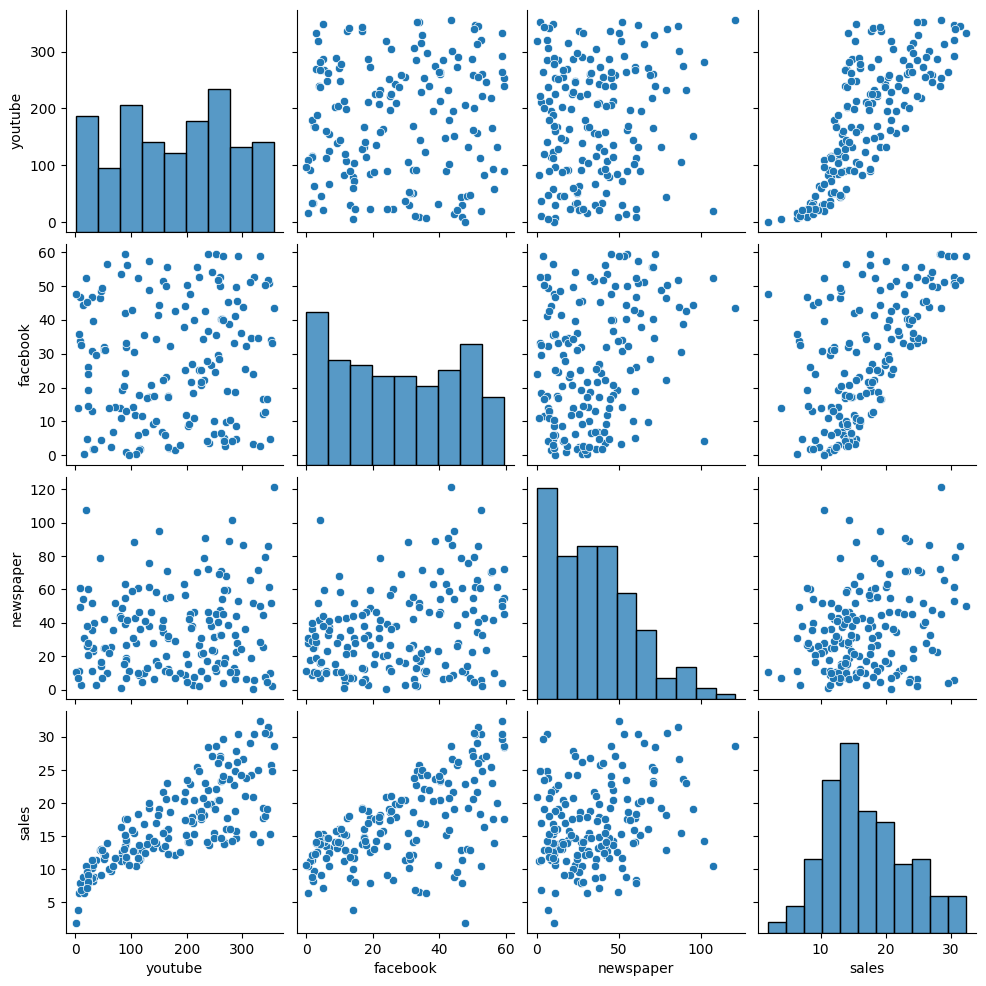

In [ ]:
sns.pairplot(base_Mkt)

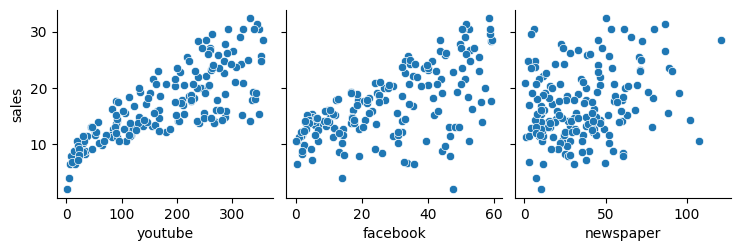

In [ ]:
sns.pairplot(base_Mkt, x_vars=['youtube','facebook','newspaper'], y_vars='sales')

In [ ]:
x = base_Mkt[['youtube','facebook','newspaper']]

y = base_Mkt[['sales']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7,test_size = 0.3, random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

r = r2_score(y_test, y_pred)

In [ ]:
print('r_quadrado é:', r)

r_quadrado é: 0.882423505618885


Text(0, 0.5, 'Preço do Imóvel')

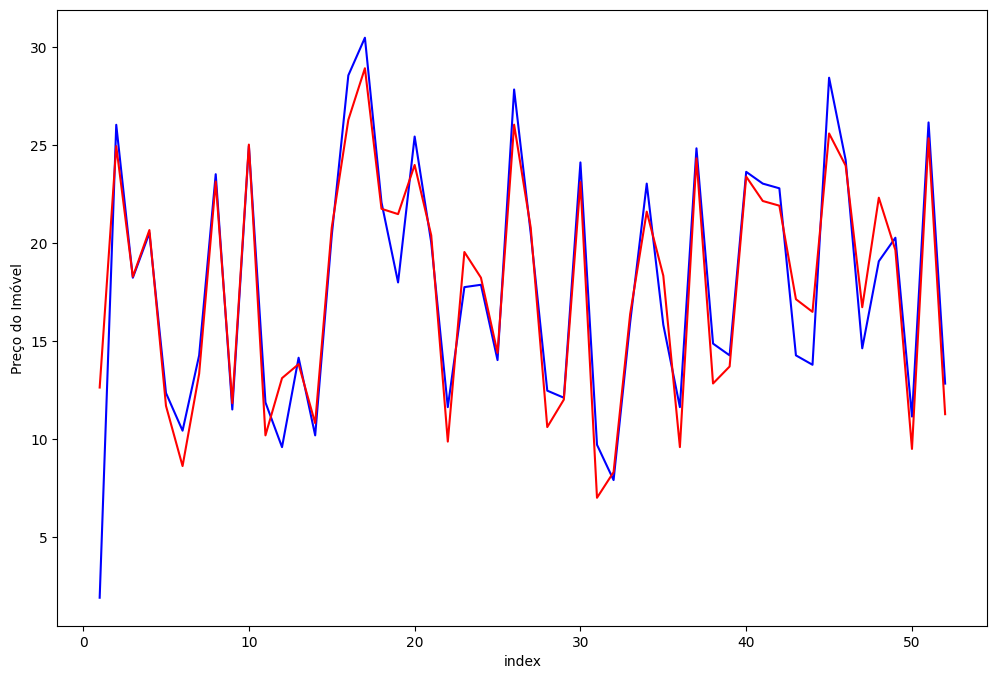

In [ ]:
c = [i for i in range(1, 53, 1)]

fig = plt.figure(figsize=(12,8))
plt.plot(c, y_test, color="blue")
plt.plot(c, y_pred, color="red")
plt.xlabel("index")
plt.ylabel("Preço do Imóvel")

fazendo predições

In [ ]:
predicao_Youtube = 200
predicao_Facebook = 30
predicao_Newspaper = 50

entrada = [[predicao_Youtube, predicao_Facebook, predicao_Newspaper]]

lm.predict(entrada)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([18.34482155])